# Deterministic Models: Nondimensionalization

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

print("packages imported")

packages imported


## Learning Goals

* Identify dimensions and units of variables and parameters in a mathematical model
* Apply nondimensionalization process to a mathematical model
* Interpret dimensionless parameters in a nondimensionalized mathematical model

## Prelecture Readings

* [MATH 360 > Nondimensionalization](http://ubcmath.github.io/MATH360/deterministic/nondimensionalization)

## Clicker Questions

1. Which of the following combinations are the base quantities from which all physical quantities are derived?

    I. Time $~~~~$ II. Mass  $~~~~$ III. Length $~~~~$ IV. Force $~~~~$ V. Electric current $~~~~$ VI. Energy

   A. I., II., III. only
   
   B. I., II., III., V. only

   C. IV. and VI. only

   D. I., II., IV., and V. only

   E. All of them are base quantities

3. Which are the correct dimensions for Acceleration?

   A. MLT

   B. LT$^{-1}$

   C. LT$^{-2}$ 

   D. LT$^{-3}$

4. When choosing a scaling factor for $t$, a possible choice is always $[t] = 1.$

   A. True

   B. False

   C. Not sure

2. Which are the correct dimensions for Density?

   A. MLT

   B. ML$^{-1}$

   C. ML$^{-2}$ 

   D. ML$^{-3}$

### Dimensions of Derivatives

What is the dimensions of $\dfrac{dx}{dt}$?  

Consider the definition of the derivative at a point $t_0$:
\begin{align*}
\dfrac{dx}{dt} \bigg|_{t =t_0} & = \lim\limits_{t \to t_0} \dfrac{x(t) - x(t_0)}{t-t_0}.
\end{align*}
The numerator has units of $[x]$ and the denominator has dimensions of $[t]$, so the derivative $\dfrac{dx}{dt}$ has dimensions of $\dfrac{[x]}{[t]}.$

What about higher order derivatives? Let's look at the second derivative, $\dfrac{d^2x}{dt^2}$, and consider the definition at the point $t_0$:

\begin{align*}
\dfrac{d^2x}{dt^2} \bigg|_{t =t_0} & = \lim\limits_{t \to t_0} \dfrac{x^{\prime}(t) - x^{\prime}(t_0)}{t-t_0}.
\end{align*}
The numerator is a difference involving the first derivative, and should have the same dimensions as the derivative: i.e., $\dfrac{[x]}{[t]}.$  The denominator has dimensions of $[t]$, and so the second derivative, as a whole, will have dimensions of $\dfrac{\dfrac{[x]}{[t]}}{[t]} = \dfrac{[x]}{[t]^2}.$

We can repeat a similar type of argument for 3rd, 4th, 5th, ... etc derivatives, and in general, the dimensions of the derivative $\dfrac{d^nx}{dt^n}$ are $\dfrac{[x]}{[t]^n}.$

#### Some dimension examples

The drag equation is given by

$$
F = \frac{1}{2} \rho v^2 A c_d
$$

where:

* $F$ is the force of drag of fluid flowing around an object
* $\rho$ is the density of the fluid
* $v$ is the velocity of the fluid
* $A$ is the cross-sectional area of the object perpendicular to the fluid flow
* $c_d$ is the drag coefficient

Determine the dimensions of all quantities in the drag equation such that the equation is **dimensionally homogeneous**.

**Solution.**

| Quantity | Symbol | Dimensions |
| :---: | :---: | :---: |
| drag force | $F$ | M L T<sup>-2</sup> |
| fluid density | $\rho$ | M L<sup>-3</sup> |
| fluid velocity | $v$ | L T<sup></sup> |
| cross-sectional area | $A$ | L<sup>2</sup> |
| drag coefficient | $c_d$ | 1 |


The equation for the deflection $v(x)$ of a beam (as a function of position $x$) under a distrubted load is given by

$$
EI \frac{d^4v}{dx^4} = q
$$

where:

* $E$ is the elastic modulus
* $I = \int_A y^2 dA$ is the moment of inertia of the cross-section of the beam
* $q$ is the distributed load (ie. force per unit length applied to the beam)

Determine the dimensions of all quantities in the deflection equation such that the equation is **dimensionally homogeneous**.

**Solution.**

| Quantity | Symbol | Dimensions |
| :---: | :---: | :---: |
| beam deflection | $v$ | L |
| position | $x$ | L |
| elastic modulus | $E$ | M L<sup>2</sup> T<sup>-2</sup> |
| cross-sectional area | $I$ | L<sup>2</sup> |
| load | $q$ | M L T<sup>-2</sup>  |

The 1-dimensional heat equation is given by

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$

where:

* $u(x,t)$ is temperature at position $x$ and time $t$
* $\alpha$ is conductivity

Determine the dimensions of all quantities in the heat equation such that the equation is **dimensionally homogeneous**.

**Solution.**

| Quantity | Symbol | Dimensions |
| :---: | :---: | :---: |
| temperature | $u$ | $\Theta$ |
| position | $x$ | L |
| time | $t$ | T |
| conductivity | $\alpha$ | L<sup>2</sup> T<sup>-1</sup> |

## Nondimensionalization and Scaling

### Mass-spring-damper system
Consider the mass-spring-damper equation with sinusoidal external forcing:

$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + k x = F_0 \cos(\omega t) \ , \ \ x(0) = \frac{dx}{dt}(0) = 0
$$

* Determine the dimensions of all variables and parameters.
* Apply the nondimensionalization process and interpret dimensionless parameters.
* Use Python to simulate the nondimensionalized system.

**Note:** There is more than one way to choose $[t]$ and $[x]$. Make the choice that makes sense to you and try to justify your choice. 

**Solution:**

**Step 1:** Time $t$ is the independent variable and position $x$ is the dependent variable.

**Step 2:** Let $t = [t] t^*$ and $x = [x] x^*$ and make the substitutions.

$$
m \frac{[x]}{[t]^2} \frac{d^2x^*}{dt^{*2}} + c \frac{[x]}{[t]} \frac{dx^*}{dt^*} + k [x] x^* = F_0 \cos \left( \omega [t] t^* \right) \ , \ \ [x]x^*(0) = 0, \, \\ \frac{[x]}{[t]}\frac{dx^*}{dt^*}(0) = 0.
$$

**Step 3:** Divide the equation by coefficient in second derivative.  For the initial conditions, we will divide the $[x]$ and $\dfrac{[x]}{[t]}$ to the right-hand sides. 

$$
\frac{d^2x^*}{dt^{*2}} + \frac{c[t]}{m} \frac{dx^*}{dt^*} + \frac{k[t]^2}{m}  x^* = \frac{F_0 [t]^2}{m [x]} \cos \left( \omega [t]t^* \right) \ , \ \ x^*(0) = \frac{dx^*}{dt^*}(0) = 0
$$

**Step 4:** We have (at least) 2 choices for $[t]$:

$$
[t] = \frac{m}{c} \ \ \text{or} \ \ [t] = \sqrt{\frac{m}{k} }.
$$

Both options have units of $T,$ so we cannot rule out any options based on incorrect units.

Since we often see oscillators with $c \approx 0$ so we'll choose the second option. Note that there is also an option to choose $[t] = \dfrac{1}{\omega},$ however, this does not simplify the differential equation. 

We have a clear choice for $[x]$ since there is only one coefficient with $[x]$ in it.

$$
\implies [x] = \frac{F_0}{k}
$$

**Step 5:** Rewrite the system:

$$
\frac{d^2x^*}{dt^{*2}} + \zeta \frac{dx^*}{dt^*} + x^* = \cos \left( \omega^* \, t^* \right) \ , \ \ x^*(0) = \frac{dx^*}{dt^*}(0) = 0
$$

where

$$
\zeta = \frac{c}{\sqrt{mk}} \ \ , \ \ \omega^* = \frac{\omega}{\omega_0} \ \ , \ \ \omega_0 = \sqrt{ \frac{k}{m} }
$$

Here, we specifically define a parameter $\omega_0$, as this is the definition of the [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency), and write $\omega^* = \dfrac{\omega}{\omega_0}$, as it is often helpful to think about the frequency in terms of what proportion of $\omega_0$ it is. Note that this is not a *completely* necessary step, but is common in the modelling of mass-spring-damper systems.

**Note:** We will want to perform the nondimensionalization process first *before* writing the differential equation as a system of equations, as it makes the process for determining the scaling factors a bit nicer. 

Next step is to re-write the 2nd order differential equation as a system of first order equations. 

Let $u_0 = x^*$, $u_1 = \dfrac{dx^*}{dt^*}$. Write as a first order system:
\begin{align*}
\frac{du_0}{dt^*} & = u_1  \\
\frac{du_1}{dt^*} & = \cos \left( \omega^* \, t^* \right) - u_0 -  \zeta u_1.
\end{align*}

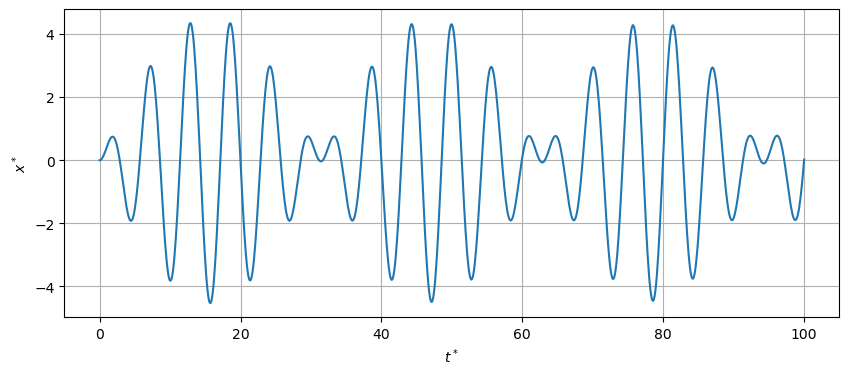

In [2]:
zeta = 0.001
w = 1.2
f = lambda u,t: np.array([u[1],np.cos(w*t) - u[0] - zeta*u[1]])
u0 = [0.,0.]
t = np.linspace(0,100,1000)
U = spi.odeint(f,u0,t)
plt.figure(figsize=(10,4))
plt.plot(t,U[:,0])
plt.xlabel('$t^*$') ## the dollar signs here are for LaTeX interpretation
plt.ylabel('$x^*$')
plt.grid(True)
plt.show()

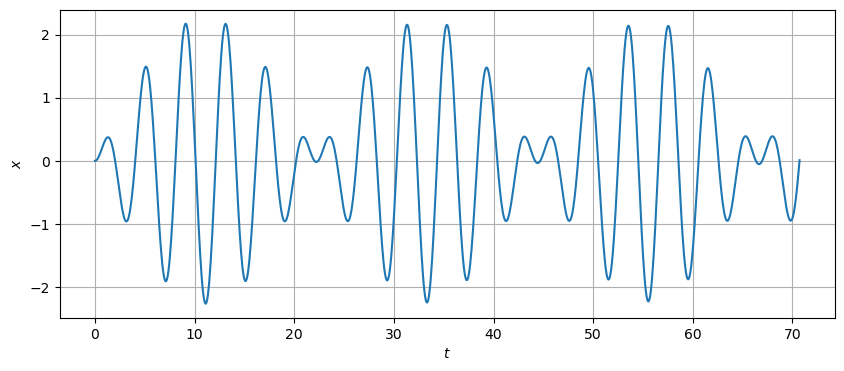

In [3]:
### If we want to plot the solution in the original units, we just need to use our definitions
### t = [t]t^* and x = [x]x^*, and our choice of [t] and [x]
### Since juptyer code will not interpret [x] and [t] as a variable, let's call these x_dim and t_dim respectively

## suppose we have the following information about the mass-spring-damper system
F_0 = 10
k = 20
m = 10
w = 1.2*np.sqrt(k/m) ## this comes from solving the w^* equation for w and that in the last code block, w^* = 1.2

x_dim = F_0/k 
t_dim = np.sqrt(m/k)

plt.figure(figsize=(10,4))
plt.plot(t*t_dim,(U[:,0])*x_dim)
plt.xlabel('$t$') ## the dollar signs here are for LaTeX interpretation
plt.ylabel('$x$')
plt.grid(True)
plt.show()
## try playing around with different k, m, and F_0 values to see how the scale of the axes change
## notice how the shape of the graph is the same as the nondimensionalized version
## but that the axes range has changed

### Coupled mass spring system
Consider the coupled mass spring system:

\begin{align*}
m_1 x_1'' &= k(x_2 - x_1) \\
m_2 x_2'' &= -k(x_2 - x_1) \\
x_1(0) &= x_1'(0) = 0 \\
x_2(0) &= d \ , \ \ x_2'(0) = v
\end{align*}

* Determine the dimensions of all variables and parameters.
* Apply the nondimensionalization process and interpret dimensionless parameters.
* Use Python to simulate the nondimensionalized system.

**Solution:**

**Step 1:** Time $t$ is the independent variable and the positions $x_1$ and $x_2$ of the masses are the dependent variables

**Step 2:** Let $t = [t]t^*$, $x_1 = [x_1]x_1^*$ and $x_2 = [x_2]x_2^*$. 

Make the substitutions.

\begin{align*}
\frac{m_1 [x_1]}{[t]^2} \frac{d^2 x_1^*}{dt^{*2}} &= k([x_2]x_2^* - [x_1]x_1^*) \\
\frac{m_2 [x_2]}{[t]^2} \frac{d^2 x_2^*}{dt^{*2}} &= -k([x_2]x_2^* - [x_1]x_1^*) \\
[x_1] x_1^*(0) &= 0 \\
\frac{[x_1]}{[t]} \frac{d x_1^*}{dt^*}(0) &= 0\\
[x_2] x_2^*(0) &= d \\
\frac{[x_2]}{[t]} \frac{d x_2^*}{dt^*}(0) &= v
\end{align*}

We should scale $x_1$ and $x_2$ by the same factor since $x_1$ and $x_2$ have the same units and since they are both mass-spring systems which operate on the same scale (i.e., both on microscale or both on macroscale).  So, let $[c] = [x_1] = [x_2]$. 

We can then simplify the system to:
\begin{align*}
\frac{m_1 [c]}{[t]^2} \frac{d^2 x_1^*}{dt^{*2}} &= k[c](x_2^* - x_1^*) \\
\frac{m_2 [c]}{[t]^2} \frac{d^2 x_2^*}{dt^{*2}} &= -k[c](x_2^* - x_1^*) \\
[c] x_1^*(0) &= 0 \\
\frac{[c]}{[t]} \frac{d x_1^*}{dt^*}(0) &= 0\\
[c] x_2^*(0) &= d \\
\frac{[c]}{[t]} \frac{d x_2^*}{dt^*}(0) &= v.
\end{align*}

**Step 3.** Divide by the highest order term in each equation.

\begin{align*}
\frac{d^2 x_1^*}{dt^{*2}} &= \frac{k[t]^2}{m_1}(x_2^* - x_1^*) \\
\frac{d^2 x_2^*}{dt^{*2}} &= -\frac{k[t]^2}{m_2}(x_2^* - x_1^*) \\
x_1^*(0) &= 0 \\
\frac{d x_1^*}{dt^*}(0) &= 0\\
x_2^*(0) &= \frac{d}{[c]} \\
\frac{d x_2^*}{dt^*}(0) &= \frac{v[t]}{[c]} 
\end{align*}

**Step 4.** Let $[c] = d$ and choose $[t] = \sqrt{\dfrac{m_1}{k}}.$  

Here, we are choosing $[t] = \sqrt{\frac{m_1}{k}}$, since our other option $-\dfrac{k[t]^2}{m_2}$ has a negative sign and we want to square root. We could also choose $[t]=\sqrt{\dfrac{m_2}{k}}$ with out the negative sign, but this leads to a similar ratio of $\dfrac{m_2}{m_1}$ in the other differential equation. 

We choose $[c]=d$ so that the initial condition for displacement is $1.$

**Step 5.** Define $\mu = \frac{m_1}{m_2},$ so that we have:
\begin{align*}
\frac{d^2 x_2^*}{dt^{*2}} &= -\frac{k[t]^2}{m_2}(x_2^* - x_1^*) \\
\frac{d^2 x_2^*}{dt^{*2}} &= -\frac{k\left(\sqrt{\frac{m_1}{k}} \right)^2}{m_2}(x_2^* - x_1^*) \\
\frac{d^2 x_2^*}{dt^{*2}} &= -\frac{k\frac{m_1}{k}}{m_2}(x_2^* - x_1^*) \\
\frac{d^2 x_2^*}{dt^{*2}} &= -\frac{m_1}{m_2}(x_2^* - x_1^*) \\
\frac{d^2 x_2^*}{dt^{*2}} &= -\mu(x_2^* - x_1^*). \\
\end{align*}

Let's also clean up the initial conditions.  The initial condition $x_2^*(0) = \frac{d}{[c]} $ will become $x_2^*(0) = 1$, but the other one requires a bit more algebra.
\begin{align*}
\frac{d x_2^*}{dt^*}(0) &= \frac{v\sqrt{\frac{m_1}{k}}}{d} \\ 
& = \frac{v}{d} \sqrt{\frac{m_1}{k}}\\
& = \nu
\end{align*}
To help with inputting in to the code, we will define $\nu = \dfrac{v}{d} \sqrt{\dfrac{m_1}{k}}.$

Then our system becomes:

\begin{align*}
\frac{d^2 x_1^*}{dt^{*2}} &= (x_2^* - x_1^*) \\
\frac{d^2 x_2^*}{dt^{*2}} &= -\mu(x_2^* - x_1^*) \\
x_1^*(0) &= 0 \\
\frac{d x_1^*}{dt^*}(0) &= 0\\
x_2^*(0) &= 1 \\
\frac{d x_2^*}{dt^*}(0) &= \nu.
\end{align*}

These are coupled, 2nd order differential equations, so we need to re-write them as a system of first order equations.

Let $u_0 = x_1^*$, $u_1 = \dfrac{dx_1^*}{dt^*}$, $u_2 = x_2^*$, $u_3 = \dfrac{dx_2^*}{dt^*}$. Then, write as a first order system.

\begin{align*}
\frac{du_0}{dt^*} &= u_1 \\
\frac{du_1}{dt^*} &= u_2 - u_0 \\
\frac{du_2}{dt^*} &= u_3 \\
\frac{du_3}{dt^*} &= -\mu(u_2 - u_0) \\
u_0(0) &= u_1(0) = 0 \\
u_2(0) &= 1 \\
u_3(0) &= \nu
\end{align*}

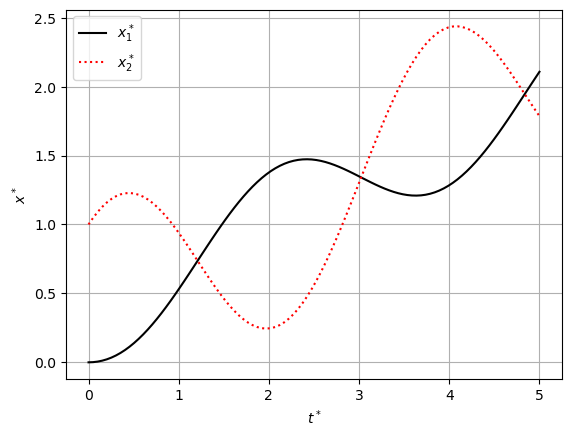

In [4]:
mu = 2 
nu = 1
f = lambda u,t: np.array([u[1],u[2] - u[0],u[3],-mu*(u[2] - u[0])])
t = np.linspace(0,5,100)
u0 = [0.,0.,1.,nu] 
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0],'k',label = '$x_1^*$')
plt.plot(t,u[:,2],':r',label = '$x_2^*$')
plt.xlabel('$t^*$') ## the dollar signs here are for LaTeX interpretation
plt.ylabel('$x^*$')
plt.legend()
plt.grid()
plt.show()

#try playing around with different mu, v, and u0 values to see how it affects the solution curve!
#also try compare your solution with the coupled mass spring system from last class

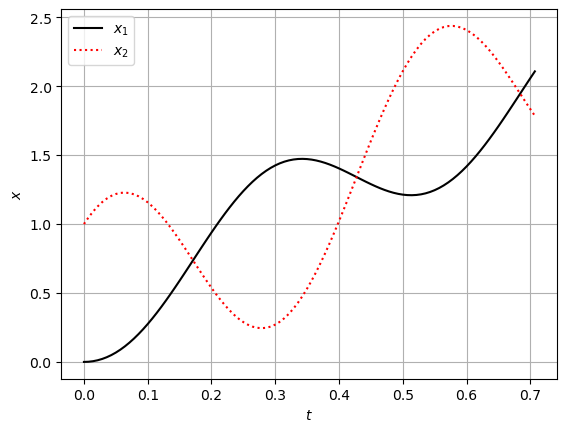

In [5]:
## suppose we want to plot with the axes having the original dimensions.
### Again, we will use our definitions t = [t]t^* and x = [c]x^*, 
### and our choice of [t] and [c]

## suppose we have the following information 
m1 = 2
m2 = 1
d = 1
v = 10
k = 100

c_dim = d
t_dim = np.sqrt(m1/k)

plt.plot(t*t_dim,(u[:,0])*c_dim,'k',label = '$x_1$')
plt.plot(t*t_dim,(u[:,2])*c_dim,':r',label = '$x_2$')
plt.xlabel('$t$') ## the dollar signs here are for LaTeX interpretation
plt.ylabel('$x$')
plt.legend()
plt.grid()
plt.show()

### SIR model
A model for the spread of infectious diseases is the [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model):

\begin{align*}
\frac{dS}{dt} &= -\frac{\beta}{N} IS \\
\frac{dI}{dt} &= \frac{\beta}{N} IS - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{align*}

where $S$ is the susceptible population, $I$ is the infected population, $R$ is the recovered population, $N$ is the total population, and $\beta$ and $\gamma$ are parameters. The model assumes that the total population $N = S+I+R$ is constant and that recovered patients cannot be reinfected.

* Determine the dimensions of all variables and parameters.
* Apply the nondimensionalization process and interpret dimensionless parameters.
* Use Python to simulate the nondimensionalized system.

**Step 1:** Time $t$ is the independent variable and $S,I,R$ are the dependent variables.

**Step 2:** Let $t = [t] t^*$, $S = [S] S^*$, $I = [I] I^*$, $R = [R] R^*$ and make the substitutions:

\begin{align*}
\frac{[S]}{[t]} \frac{dS^*}{dt^*} &= -\frac{\beta}{N} [I][S]I^*S^* \\
\frac{[I]}{[t]} \frac{dI^*}{dt^*} &= \frac{\beta}{N} [I][S]I^*S^* - \gamma [I]I^* \\
\frac{[R]}{[t]} \frac{dR^*}{dt^*} &= \gamma [I]I^*
\end{align*}

**Step 3:** We want to divide all equations in the model by the coefficient of the highest order polynomial or derivative term.  For the first two equations, the the highest order term is the $I^*S^*$ term.  For the third equation, the derivative and the term on the right-hand side have the same order, so we divide by the coefficient of the derivative.

Divide the first two equations by the coefficient of $I^*S^*$ and divide third equation by $[R]/[t]$:

\begin{align*}
\frac{N}{\beta [t] [I]} \frac{dS^*}{dt^*} &= -I^*S^* \\
\frac{N}{\beta [t] [S]} \frac{dI^*}{dt^*} &= I^*S^* - \frac{\gamma N}{\beta [S]} I^* \\
\frac{dR^*}{dt^*} &= \frac{\gamma [t] [I]}{[R]}I^*
\end{align*}

**Step 4:** From the second equation, we can determine our choice for $[S]$ $\rightarrow$ namely, $[S] = \dfrac{\gamma N}{\beta}.$  Now that we have $[S]$, we can determine $[t]$ from the second equation as well.  Substituting $[S]$ into the coefficient given: 

\begin{align*}
\frac{N}{\beta [t] [S]} & = \frac{N}{\beta [t] \frac{\gamma N}{\beta}} \\
& = \frac{1}{ [t] \gamma}.
\end{align*}
We can now choose our $[t]$ $\rightarrow$  $[t] = \dfrac{1}{\gamma}.$  Using the first equation and our definition for $[t]$, we can determine $[I]$.

\begin{align*}
\frac{N}{\beta [t] [I]} & = \frac{N}{\beta \frac{1}{\gamma} [I]} \\ 
& = \frac{N \gamma }{\beta[I]}
\end{align*}
We can now choose our $[I]$ $\rightarrow$  $[I] = \frac{\gamma N}{\beta}.$  Finally, we can use the third equation and our definitions, for $[t]$ and $[I]$ to determine $[R].$
\begin{align*}
\frac{\gamma [t] [I]}{[R]} & = \frac{\gamma \left( \frac{1}{\gamma} \right) \left(\frac{\gamma N}{\beta} \right)}{[R]} \\ 
& =  \frac{\gamma N}{\beta[R]}
\end{align*}
Our choice for $[R]$ is then $[R] = \dfrac{\gamma N}{\beta}.$

Summary:

$$
[S] = \frac{\gamma N}{\beta}, \ \ \ \
[I] = \frac{\gamma N}{\beta}, \ \ \ \
[R] = \frac{\gamma N}{\beta}, \ \ \ \
[t] = \frac{1}{\gamma}
$$

**Note:** Notice how $[S]$, $[I]$, and $[R]$ have the same scaling factor. Since $N = S+I+R$ it is not unreasonable to scale $S,I,$ and $R$, by the same factor.  However, this is not a given, and we should work through the nondimensionalization process to ensure we have the correct scalings.

**Note 2:** As a check, check that each of $[S]$, $[I]$, $[R],$ and $[t]$ have the correct units.

**Step 5:** Rewrite the system:

\begin{align*}
\frac{dS^*}{dt^*} &= -I^*S^* \\
\frac{dI^*}{dt^*} &= I^*S^* - I^* \\
\frac{dR^*}{dt^*} &= I^*
\end{align*}

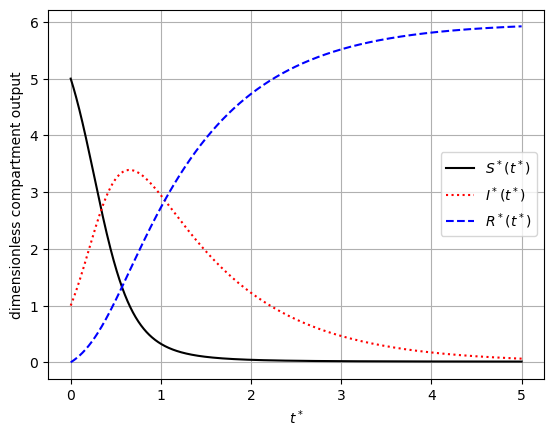

In [6]:
## simulate the nondimensionalize system of differential equations
## this is already a system of first order equations
## for the initial condition, we will choose a population that is mostly in the 
## susceptible category and some in the infected
## try also playing around with intitial conditions to see how it affects the model output!

u0 = [5.,1.,0.]
t = np.linspace(0,5,1000)
f = lambda u,t: np.array([-u[0]*u[1],u[0]*u[1] - u[1],u[1]])
U = spi.odeint(f,u0,t)
plt.plot(t,U[:,0],'k',t,U[:,1],':r',t,U[:,2],'--b')
plt.grid(True)
plt.legend(['$S^*(t^*)$','$I^*(t^*)$','$R^*(t^*)$'])
plt.xlabel('$t^*$')
plt.ylabel('dimensionless compartment output')
plt.show()

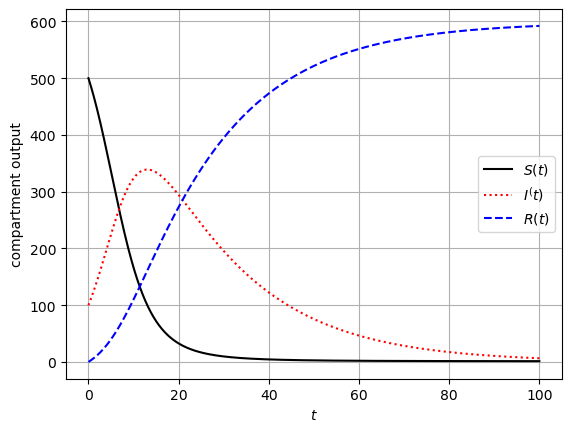

In [7]:
gamma = 0.05 
beta = 0.5
N = 1000

SIR_dim = gamma * N / beta
t_dim = 1/gamma

plt.plot(t*t_dim,(U[:,0])*SIR_dim,'k',t*t_dim,(U[:,1])*SIR_dim,':r',t*t_dim,(U[:,2])*SIR_dim,'--b')
plt.grid(True)
plt.legend(['$S(t)$','$I^(t)$','$R(t)$'])
plt.xlabel('$t$')
plt.ylabel('compartment output')
plt.show()